In [57]:
import pandas as pd
import numpy as np

In [58]:
df = pd.DataFrame({
    'client_id':[None,3898.0,None,None,5736.0],
    'sex':[None,1.0,None,None,0.0],
    'wealth':[None,'high',None,None,'high'],
    'age':['58','55','46','23','44']
})
df

,client_id,sex,wealth,age
0,NaN,NaN,None,58
1,3898.0,1.0,high,55
2,NaN,NaN,None,46
3,NaN,NaN,None,23
4,5736.0,0.0,high,44


In [59]:
'''1) В переменной df находится датафрэйм. Ваша задача положить в переменную  df_shape строку с информацией сколько линий и столбцов он имеет в следующем виде:
'df has y rows and x columns'
где y – число строк, а x – число колонок.'''
df_shape = f'df has {df.shape[0]} rows and {df.shape[1]} columns'
df_shape

'df has 5 rows and 4 columns'

In [60]:
'''2) Положите в переменную na_number серию, в которой для каждой колонки указано сколько ячеек
содержат пропущенные значения.'''
na_number = df.isnull().sum()
na_number

client_id    3
sex          3
wealth       3
age          0
dtype: int64

In [61]:
'''3) Сохраните в переменную df_types типы данных каждой колонки датафрэйма df.'''
df_types = df.dtypes
df_types

client_id    float64
sex          float64
wealth        object
age           object
dtype: object

In [62]:
'''4) Внезапно оказалось, что в переменной age значения хранятся в виде строк! 
Поменяйте тип значений на целочисленный в этой колонке датафрэйма df.'''
df['age'] = df['age'].astype('int64')

In [63]:
'''5) Как выяснилось, для дальнейшего анализа нам не понадобятся колонки sex и age – удалите их.'''
df.drop(['sex','age'],axis=1,inplace=True)

In [64]:
'''6) А теперь проверим, есть ли в нашей таблице df дубликаты по полю client_id – дропните все строки, в которых значения в колонке client_id повторяются.
'''
df = df.drop_duplicates(subset=['client_id'])
df

,client_id,wealth
0,NaN,None
1,3898.0,high
4,5736.0,high


In [65]:
'''7) Небольшой перерыв на чистый питон. В списке numbers содержатся числа. Добавьте через цикл в список positive_numbers положительные числа из numbers. При этом, если вам попался 0, то нужно прекратить этот цикл.
Например,
numbers = [1, -2, 3, 0, -3, 2]
Тогда positive_numbers должен быть:
positive_numbers = [1, 3]'''
numbers = [1, -2, 3, 0, -3, 2]
positive_numbers = [i for i in numbers if i>0]
positive_numbers

[1, 3, 2]

In [66]:
'''8) Продолжим анализ данных по поездкам. В предыдущем уроке вы изучили распределения оценок водителей и клиентов.
Теперь посмотрим на колонки со временем!
Сохраните данные, находящиеся в папке (taxi_peru.csv), в переменную taxi, разделитель – ;. 
Затем приведите столбцы start_at, end_at, arrived_at к формату даты, используя pd.to_datetime(). 
Отфильтруйте данные и оставьте наблюдения со статусом заказа "asap" и "reserved" (start_type) .'''
taxi = pd.read_csv(r'C:\Users\asus\Desktop\DA_projects\karpov\band3\task1\taxi_peru.csv',sep=';')

In [67]:
taxi['start_at'] = pd.to_datetime(taxi['start_at'])
taxi['end_at'] = pd.to_datetime(taxi['end_at'])
taxi['arrived_at'] = pd.to_datetime(taxi['arrived_at'])

In [68]:
taxi = taxi[(taxi['start_type']=='asap')|(taxi['start_type']=='reserved')]

In [69]:
'''9) ⭐️Задание со звёздочкой!⭐️
Создайте колонку wait_time, в которой будет храниться разница между временем подачи машины (arrived_at) и временем заказа (start_at) в минутах.
Чтобы сконвертировать полученный результат в минуты, можно использовать метод  .astype('timedelta64[m]')
'''
taxi['wait_time'] = (taxi['arrived_at']-taxi['start_at']).astype('timedelta64[m]')

In [74]:
'''9.1) ⭐️Задание со звёздочкой!⭐️
Посмотрим, какие водители опаздывали на заказы к определенному времени (start_type == 'reserved'). Опозданием считается время ожидания wait_time > 0.0.
Сгруппируйте отфильтрованные данные по driver_id и в качестве ответа укажите id водителя, который опоздал на заказ интересующего нас типа наибольшее число раз
'''
taxi[(taxi['start_type']=='reserved')&(taxi['wait_time']>0)]['user_id'].value_counts().idxmax()

'8e37a68fab5f31a5e2c1b5f77c6bb9e5'

In [83]:
'''11) ⭐️Задание со звёздочкой!⭐️
Добавьте столбец month, где будет храниться месяц, в котором был сделан заказ (start_at), как номер, и столбец weekday – название дня недели. 
'''
taxi['month'] = taxi['start_at'].dt.strftime('%m')
taxi['weekday'] = taxi['start_at'].dt.strftime('%A')

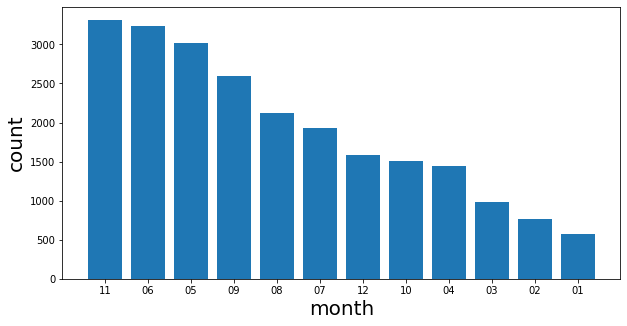

In [99]:
'''12) ⭐️Задание со звёздочкой!⭐️
Постройте график числа заказов по месяцам (month). Подумайте, с чем может быть связана полученная картина. 
Вопрос: в каком летнем месяце было сделано наименьшее число заказов? В качестве ответа введите номер месяца (6, 7 или 8). 
'''
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,5))
plt.bar(taxi['month'].unique(),taxi['month'].value_counts())
plt.xlabel('month',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.show()

In [107]:
taxi[(taxi['month']=='06')|(taxi['month']=='07')|(taxi['month']=='08')]['month'].value_counts().idxmin()

'07'

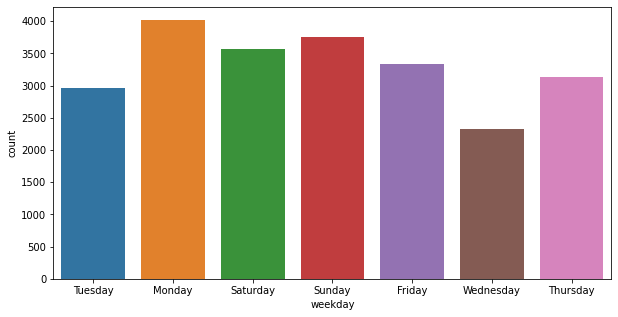

In [113]:
'''13) ⭐️Задание со звёздочкой!⭐️
А теперь – график по дням недели (weekday). Задать порядок столбиков на графике можно с помощью аргумента order, которому нужно передать список названий в нужном порядке. Например: 
sns.countplot(data['column'], order=['One', 'Two', 'Three'])
Вопрос: в какой день недели суммарно поступило меньше всего заказов?
'''
import seaborn as sns
plt.figure(figsize=(10,5))
sns.countplot(data=taxi,x='weekday')
plt.show()

<AxesSubplot:>

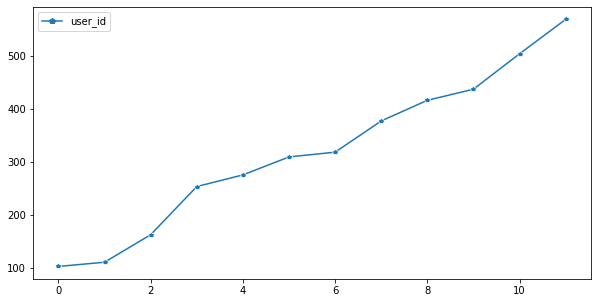

In [131]:
'''14) ⭐️Задание со звёздочкой!⭐️
Также мы можем посмотреть на несколько простых метрик, показывающих число уникальных пользователей за определённый период:
DAU (daily active users) – число уникальных пользователей за день
WAU (weekly active users) – число уникальных пользователей за неделю
MAU (monthly active users) – число уникальных пользователей за месяц
Активные пользователи – те, кто воспользовался приложением и сделал хотя бы один заказ за выбранный промежуток времени.
Постройте график MAU и выберите верные утверждения. '''
mau = taxi.groupby('month',as_index=False).agg({'user_id':'nunique'})
plt.figure(figsize=(10,5))
sns.lineplot(data=mau,markers='p')